In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys

import numpy as np
import pandas as pd

sys.path.insert(0, '..')
from match.make_match_panel import make_match_panel
from match.make_summary_match_panel import make_summary_match_panel
from match.make_comparison_panel import make_comparison_panel

Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x11a9e5bf8> (1 process) ...
Computing MoEs with 10 samplings ...
	1/10 ...
	4/10 ...
	7/10 ...
	10/10 ...
	10/10 - done.
Computing p-values and FDRs with 10 permutations ...
	1/10 ...
	4/10 ...
	7/10 ...
	10/10 ...
	10/10 - done.


,Score,0.95 MoE,P-Value,FDR
Gene Set,,,,
GO_14_3_3_PROTEIN_BINDING,0.523070,0.185265,0.133333,0.533333
ONGUSAHA_TP53_TARGETS,0.188894,0.235369,0.466667,0.840000
GO_NEURON_CELL_CELL_ADHESION,-0.658196,0.188221,0.022222,0.100000
GO_SH2_DOMAIN_BINDING,0.396716,0.167085,0.177778,0.533333
YAP signature based on cell NIH3T3_MCD10A in paper GENES & DEVELOPMENT 22:1962–1971 2008,0.865167,0.172696,0.011111,0.100000
YAP signature based on mechanism,-0.865856,0.160829,0.011111,0.100000
BIOCARTA_RHO_PATHWAY,-0.373638,0.167837,0.111111,0.250000
VANTVEER_BREAST_CANCER_BRCA1_UP,-0.404066,0.279272,0.088889,0.250000
"YAP signature based on cell HEK293 in paper Cell 150, 780–791, August 17, 2012",0.283160,0.304364,0.300000,0.675000


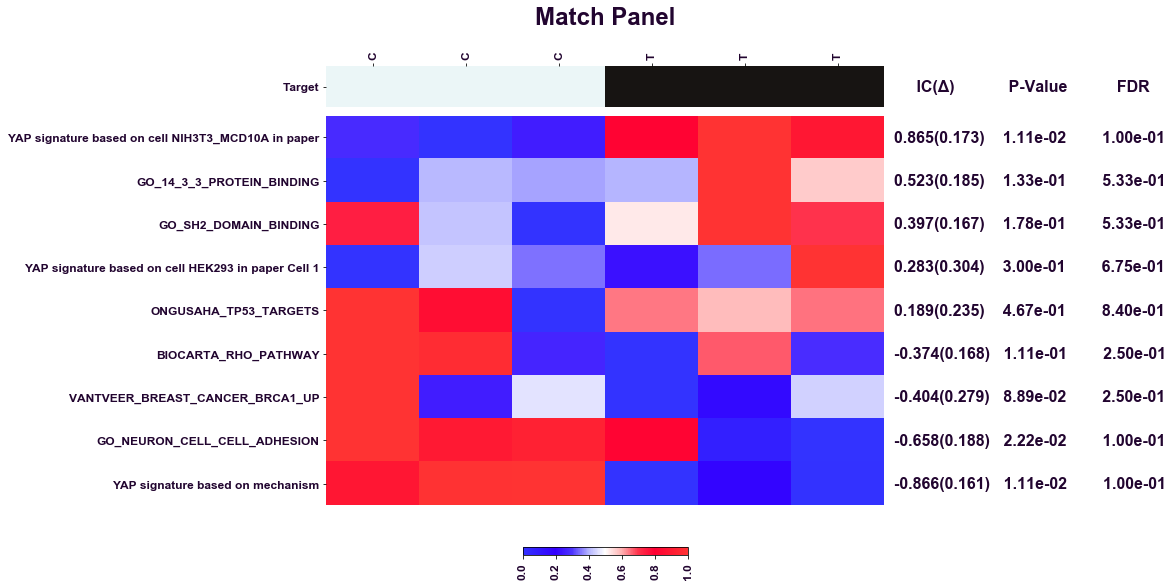

In [3]:
features = pd.read_table('gene_set_x_sample.tsv', index_col=0)

target = pd.Series(
    (0, ) * 3 + (1, ) * 3, name='Target', index=features.columns)

make_match_panel(
    target,
    features,
    target_ascending=True,
    target_type='binary',
    target_xticklabels=('C', ) * 3 + ('T', ) * 3)

Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x11a9e5bf8> (1 process) ...
There is less than 5 samples after dropping nans.
There is less than 5 samples after dropping nans.
There is less than 5 samples after dropping nans.
There is less than 5 samples after dropping nans.
There is less than 5 samples after dropping nans.
There is less than 5 samples after dropping nans.
There is less than 5 samples after dropping nans.
There is less than 5 samples after dropping nans.
There is less than 5 samples after dropping nans.
There is less than 5 samples after dropping nans.
There is less than 5 samples after dropping nans.


,Score,0.95 MoE,P-Value,FDR
Name,,,,
2-aminoadipate,0.360487,NaN,NaN,NaN
3-phosphoglycerate,0.365135,NaN,NaN,NaN
alpha-glycerophosphate,-0.373703,NaN,NaN,NaN
4-pyridoxate,0.205947,NaN,NaN,NaN
aconitate,0.287496,NaN,NaN,NaN
adenine,-0.341681,NaN,NaN,NaN
adipate,0.351589,NaN,NaN,NaN
alpha-ketoglutarate,-0.417656,NaN,NaN,NaN
AMP,-0.351411,NaN,NaN,NaN


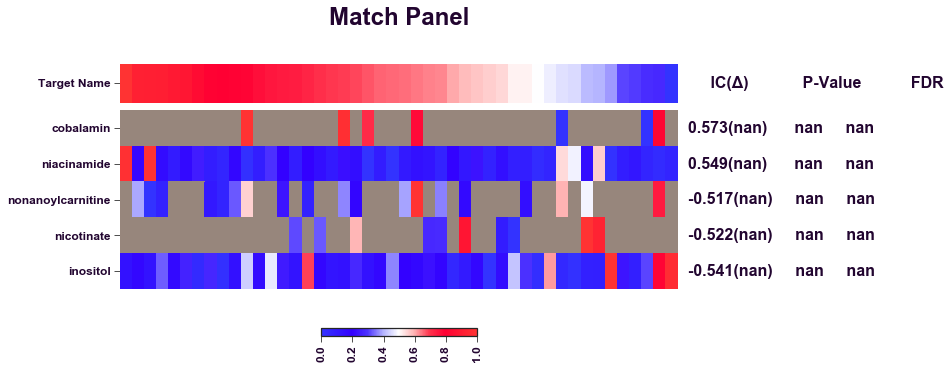

In [4]:
target = pd.read_table('target.tsv', index_col=0, header=None, squeeze=True)
target.name = 'Target Name'

features = pd.read_table('features.tsv', index_col=0)

make_match_panel(
    target,
    features,
    n_top_feature=3,
    max_n_feature=5,
    n_sampling=0,
    n_permutation=0)

In [5]:
n_row = 100
n_column = 100

Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x11a9e5bf8> (1 process) ...
Computing MoEs with 10 samplings ...
	1/10 ...
	4/10 ...
	7/10 ...
	10/10 ...
	10/10 - done.
Computing p-values and FDRs with 10 permutations ...
	1/10 ...
	4/10 ...
	7/10 ...
	10/10 ...
	10/10 - done.


,Score,0.95 MoE,P-Value,FDR
Feature 0,-0.150952,NaN,0.254,0.960000
Feature 1,0.121014,NaN,0.412,0.826415
Feature 2,0.158311,NaN,0.234,0.826415
Feature 3,0.136917,NaN,0.338,0.826415
Feature 4,-0.191899,NaN,0.114,0.750000
Feature 5,-0.250634,0.142893,0.017,0.440000
Feature 6,0.244895,0.032131,0.023,0.766667
Feature 7,-0.137105,NaN,0.320,0.970667
Feature 8,-0.237934,0.06103,0.029,0.483333
Feature 9,0.275609,0.110302,0.004,0.200000


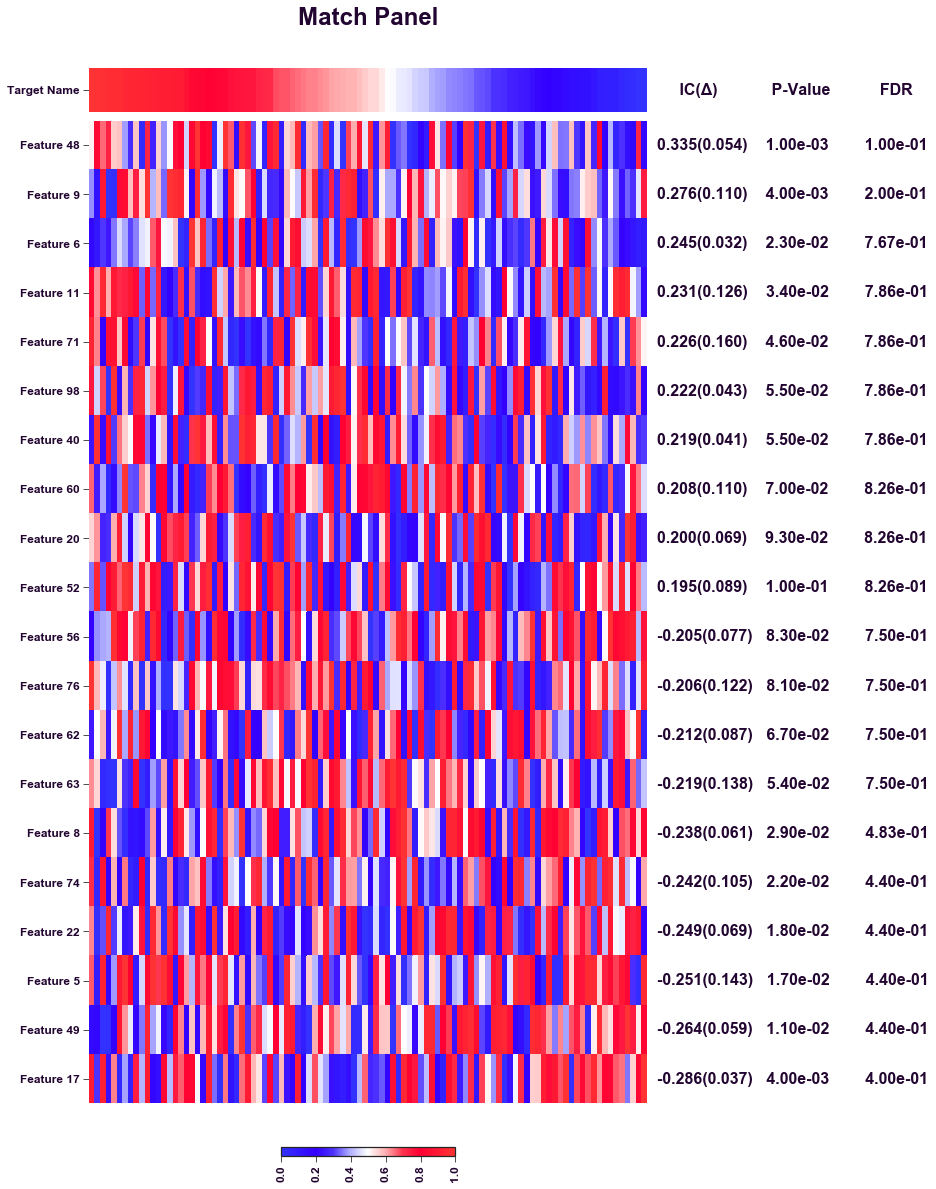

In [6]:
target = pd.Series(
    np.random.random_sample(n_column),
    name='Target Name',
    index=('Sample {}'.format(i) for i in range(n_column)))

features_continuous = pd.DataFrame(
    np.random.random_sample((
        n_row,
        n_column, )),
    index=('Feature {}'.format(i) for i in range(n_row)),
    columns=('Sample {}'.format(i) for i in range(n_column)))

make_match_panel(target, features_continuous)

Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x11a9e5bf8> (1 process) ...


/Users/k/Jumis/conda/lib/python3.6/site-packages/ipykernel/__main__.py:4: DeprecationWarning: This function is deprecated. Please call randint(0, 5 + 1) instead


Computing MoEs with 10 samplings ...
	1/10 ...
	4/10 ...
	7/10 ...
	10/10 ...
	10/10 - done.
Computing p-values and FDRs with 10 permutations ...
	1/10 ...
	4/10 ...
	7/10 ...
	10/10 ...
	10/10 - done.


,Score,0.95 MoE,P-Value,FDR
Feature 0,0.247427,0.0850747,0.017,0.700000
Feature 1,0.135584,NaN,0.286,0.775472
Feature 2,0.145464,NaN,0.243,0.775472
Feature 3,0.119571,NaN,0.354,0.775472
Feature 4,-0.123411,NaN,0.351,0.917895
Feature 5,0.124259,NaN,0.332,0.775472
Feature 6,0.137062,NaN,0.280,0.775472
Feature 7,0.114463,NaN,0.383,0.775472
Feature 8,-0.153218,NaN,0.214,0.917895
Feature 9,-0.248718,0.0835308,0.012,0.866667


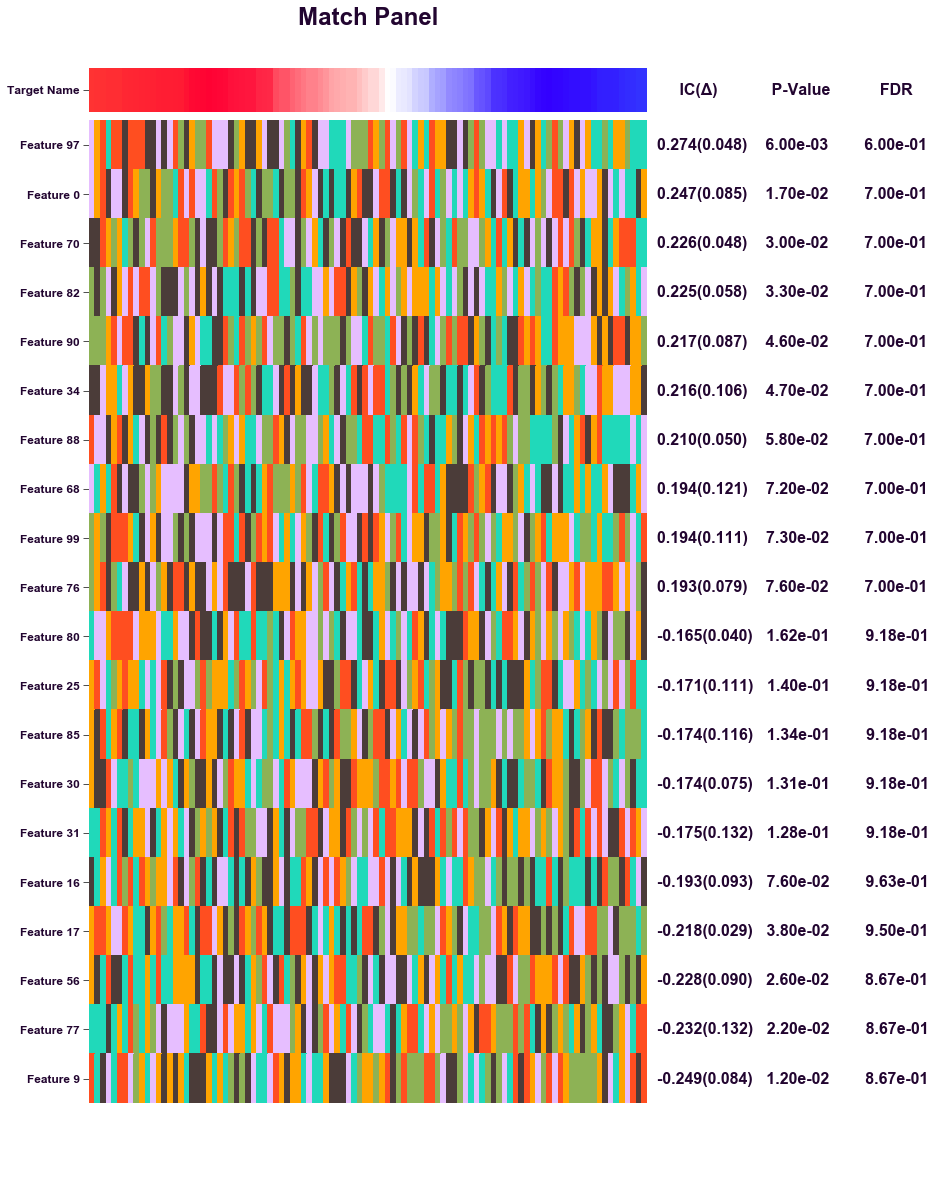

In [7]:
features_categorical = pd.DataFrame(
    np.random.random_integers(0, 5, size=(
        n_row,
        n_column, )),
    index=('Feature {}'.format(i) for i in range(n_row)),
    columns=('Sample {}'.format(i) for i in range(n_column)))

make_match_panel(target, features_categorical, features_type='categorical')

Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x11a9e5bf8> (1 process) ...


/Users/k/Jumis/conda/lib/python3.6/site-packages/ipykernel/__main__.py:4: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead


Computing MoEs with 10 samplings ...
	1/10 ...
	4/10 ...
	7/10 ...
	10/10 ...
	10/10 - done.
Computing p-values and FDRs with 10 permutations ...
	1/10 ...
	4/10 ...
	7/10 ...
	10/10 ...
	10/10 - done.


,Score,0.95 MoE,P-Value,FDR
Feature 0,-0.181946,0.0934453,0.047,0.917722
Feature 1,-0.085065,NaN,0.338,0.917722
Feature 2,-0.019835,NaN,0.495,0.917722
Feature 3,-0.045004,NaN,0.474,0.917722
Feature 4,0.056647,NaN,0.440,0.917722
Feature 5,0.213368,0.0851403,0.016,0.320000
Feature 6,-0.073780,NaN,0.375,0.917722
Feature 7,-0.128256,NaN,0.167,0.917722
Feature 8,-0.074142,NaN,0.373,0.917722
Feature 9,0.190642,0.0651828,0.032,0.400000


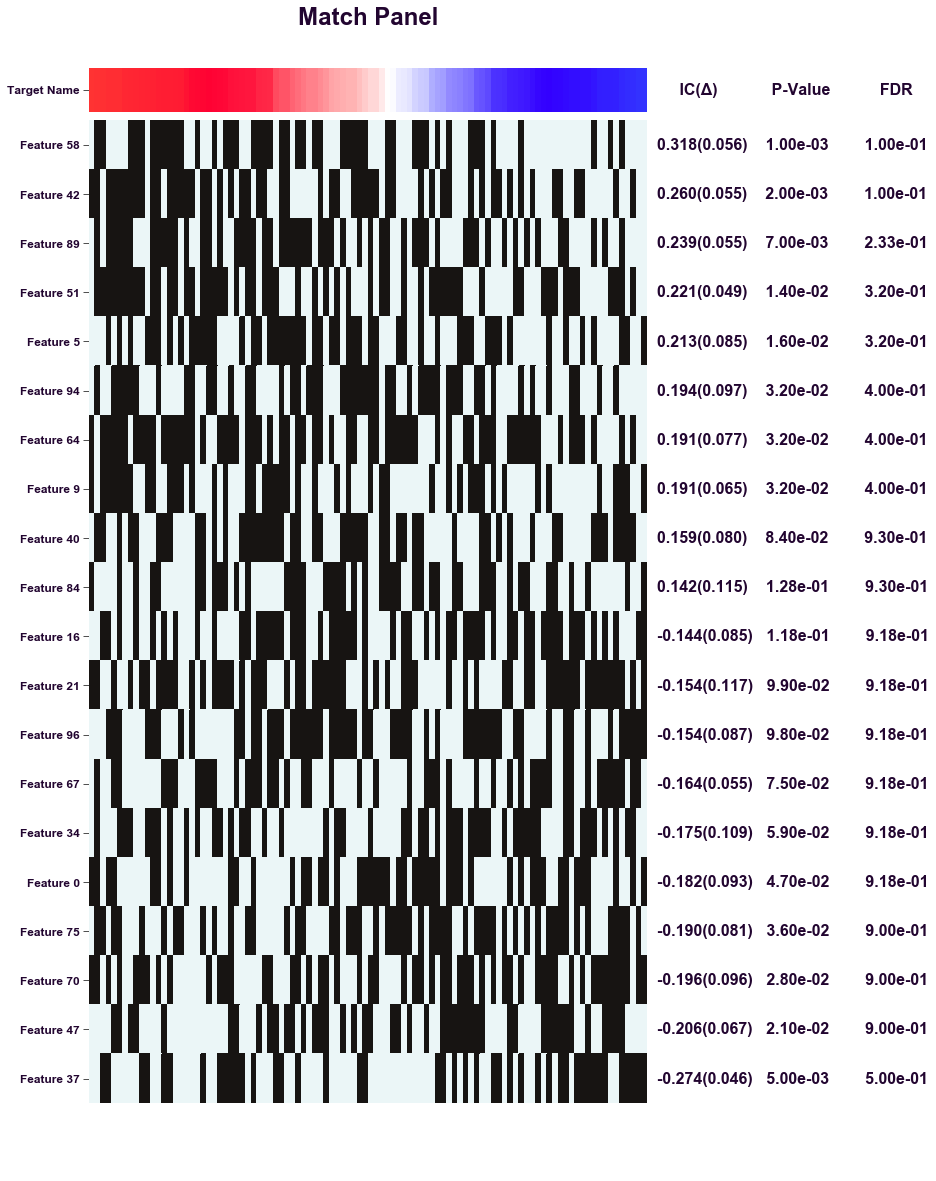

In [8]:
features_binary = pd.DataFrame(
    np.random.random_integers(0, 1, size=(
        n_row,
        n_column, )),
    index=('Feature {}'.format(i) for i in range(n_row)),
    columns=('Sample {}'.format(i) for i in range(n_column)))

make_match_panel(target, features_binary, features_type='binary')

Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x11a9e5bf8> (1 process) ...
Computing MoEs with 10 samplings ...
	1/10 ...
	4/10 ...
	7/10 ...
	10/10 ...
	10/10 - done.
Computing p-values and FDRs with 10 permutations ...
	1/10 ...
	4/10 ...
	7/10 ...
	10/10 ...
	10/10 - done.


,Score,0.95 MoE,P-Value,FDR
Feature 0,-0.192943,NaN,0.116,0.800000
Feature 1,0.121014,NaN,0.412,0.838462
Feature 2,0.148637,NaN,0.288,0.838462
Feature 3,-0.113918,NaN,0.419,0.936508
Feature 4,-0.191899,NaN,0.121,0.800000
Feature 5,-0.250634,0.142893,0.025,0.500000
Feature 6,0.270515,0.0432267,0.009,0.400000
Feature 7,-0.137105,NaN,0.334,0.959459
Feature 8,-0.237934,0.06103,0.037,0.528571
Feature 9,0.199223,NaN,0.104,0.823810


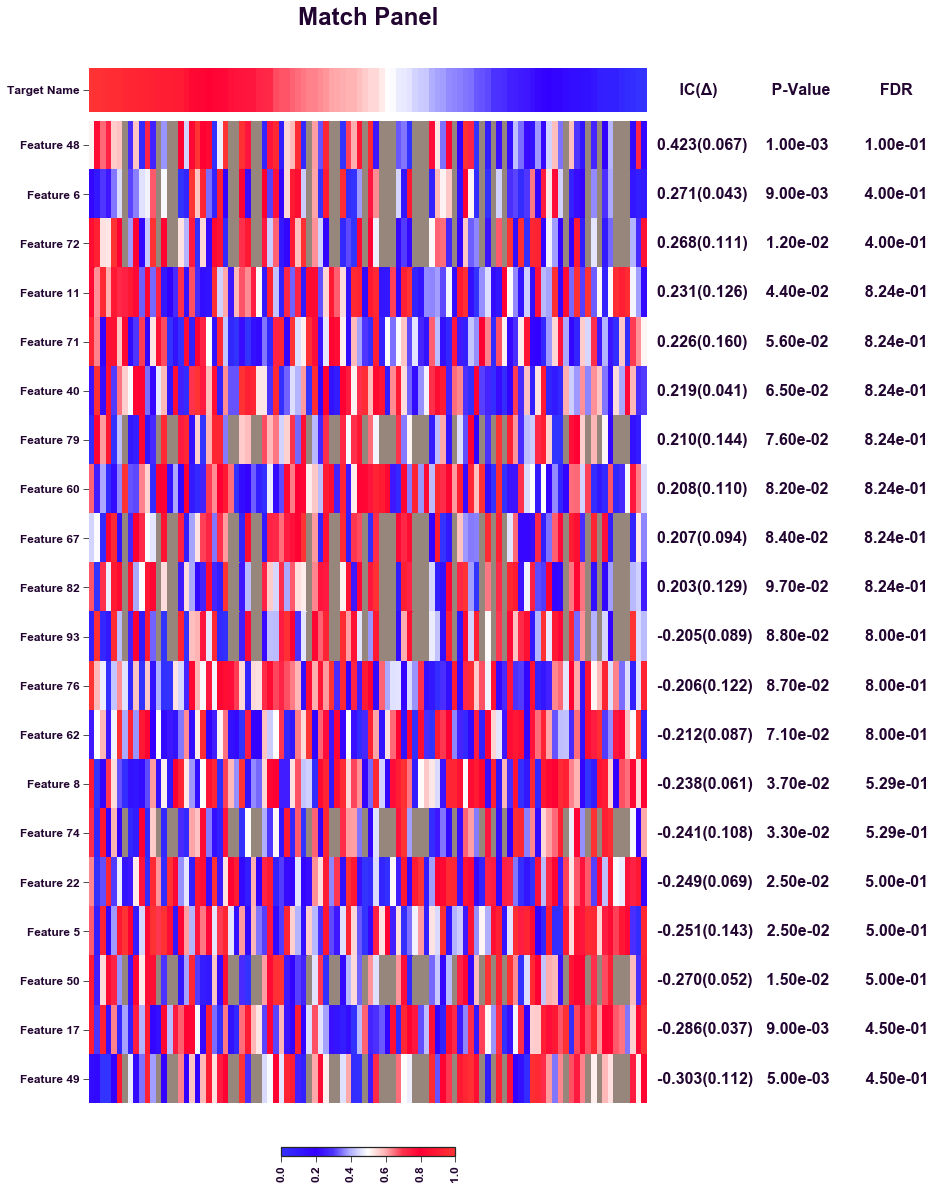

In [9]:
features_with_missing = features_continuous.copy()
features_with_missing.loc[
    np.random.choice(features_with_missing.index, size=n_column // 3),
    np.random.choice(features_with_missing.columns, size=n_column // 3)] = None

make_match_panel(target, features_with_missing)

Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x11a9e5bf8> (1 process) ...
Computing p-values and FDRs with 10 permutations ...
	1/10 ...
	4/10 ...
	7/10 ...
	10/10 ...
	10/10 - done.


,Score,0.95 MoE,P-Value,FDR
Feature 0,0.330619,NaN,0.326,0.800000
Feature 1,0.206133,NaN,0.391,0.850000
Feature 2,0.358077,NaN,0.313,0.800000
Feature 3,-0.824244,NaN,0.093,0.938144
Feature 4,0.744579,NaN,0.171,0.800000
Feature 5,0.668211,NaN,0.199,0.800000
Feature 6,0.830717,NaN,0.058,0.800000
Feature 7,0.170986,NaN,0.404,0.859574
Feature 8,0.811711,NaN,0.124,0.800000
Feature 9,0.265285,NaN,0.364,0.827273


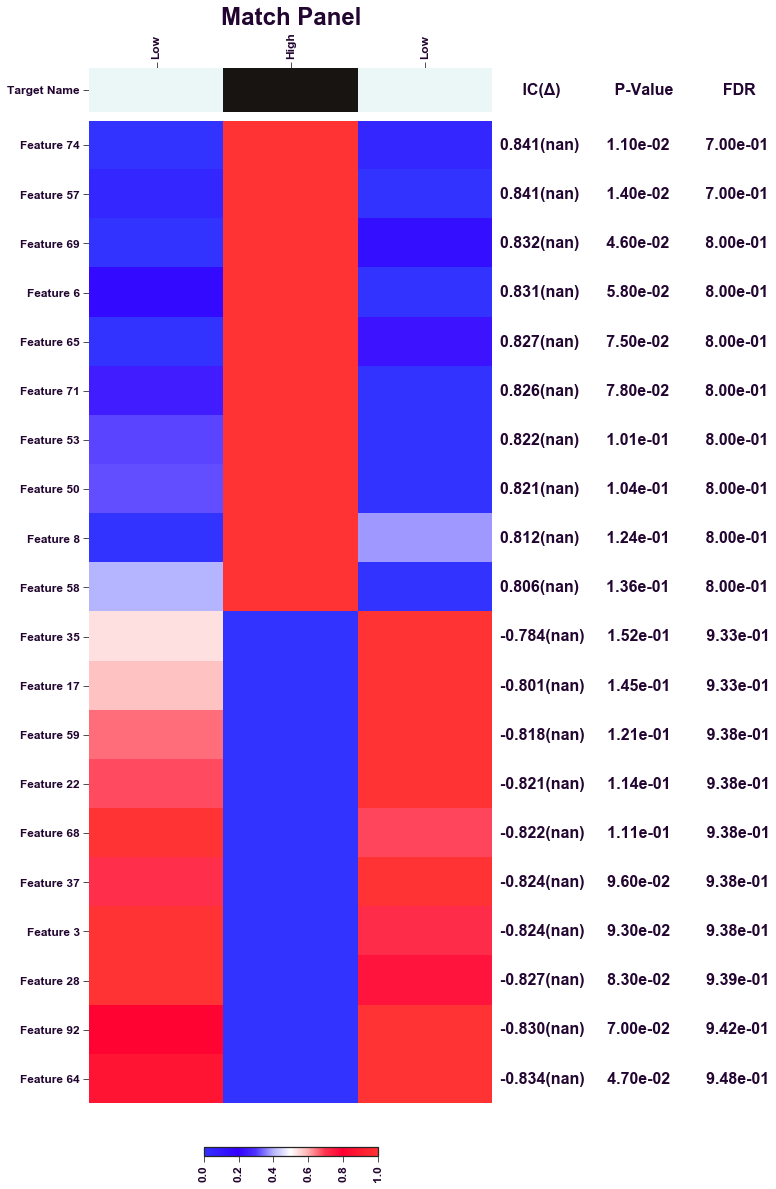

In [10]:
features = pd.DataFrame(
    np.random.random_sample((
        n_row,
        3, )),
    index=('Feature {}'.format(i) for i in range(n_row)),
    columns=('Sample {}'.format(i) for i in range(3)))

target = pd.Series(
    (
        0,
        1,
        0, ), name='Target Name', index=features.columns)

make_match_panel(
    target,
    features,
    target_ascending=None,
    target_type='binary',
    min_n_sample=3,
    target_xticklabels=(
        'Low',
        'High',
        'Low', ))

In [11]:
target = pd.Series(
    np.random.random_sample(n_column),
    name='Target Name',
    index=('Sample {}'.format(i) for i in range(n_column)))

features_continuous = pd.DataFrame(
    np.random.random_sample((
        n_row,
        n_column, )),
    index=('Feature {}'.format(i) for i in range(n_row)),
    columns=('Sample {}'.format(i) for i in range(n_column)))

n = 3

multiple_features = {
    'Continuous features': {
        'df': features_continuous.iloc[:n, :],
        'indices': ['Feature {}'.format(i) for i in range(n)],
        'index_aliases': ['Alias {}'.format(i) for i in range(n)],
        'emphasis': 'high',
        'data_type': 'continuous',
    },
    'Categorical features': {
        'df': features_categorical.iloc[:n, :],
        'indices': ['Feature {}'.format(i) for i in range(n)],
        'index_aliases': ['Alias {}'.format(i) for i in range(n)],
        'emphasis': 'high',
        'data_type': 'categorical',
    },
    'Binary features': {
        'df': features_binary.iloc[:n, :],
        'indices': ['Feature {}'.format(i) for i in range(n)],
        'index_aliases': ['Alias {}'.format(i) for i in range(n)],
        'emphasis': 'high',
        'data_type': 'binary',
    },
    'Cotinuous features (missing last 10 & scores ascending)': {
        'df': features_continuous.iloc[:n, :-10],
        'indices': ['Feature {}'.format(i) for i in range(n)],
        'index_aliases': ['Alias {}'.format(i) for i in range(n)],
        'emphasis': 'low',
        'data_type': 'continuous',
    },
    'Cotinuous features (missing first 10 & scores ascending)': {
        'df': features_continuous.iloc[:n, 10:],
        'indices': ['Feature {}'.format(i) for i in range(n)],
        'index_aliases': ['Alias {}'.format(i) for i in range(n)],
        'emphasis': 'low',
        'data_type': 'continuous',
    },
}

Making match panel for Continuous features ...
Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x11a9e5bf8> (1 process) ...
Computing MoEs with 10 samplings ...
	1/10 ...
	4/10 ...
	7/10 ...
	10/10 ...
	10/10 - done.
Computing p-values and FDRs with 10 permutations ...
	1/10 ...
	4/10 ...
	7/10 ...
	10/10 ...
	10/10 - done.
Making match panel for Categorical features ...
Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x11a9e5bf8> (1 process) ...
Computing MoEs with 10 samplings ...
	1/10 ...
	4/10 ...
	7/10 ...
	10/10 ...
	10/10 - done.
Computing p-values and FDRs with 10 permutations ...
	1/10 ...
	4/10 ...
	7/10 ...
	10/10 ...
	10/10 - done.
Making match panel for Binary features ...
Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x11a9e5bf8> (1 process) ...
Computing MoEs with 10 samplings ...
	1/10 ...
	4/10 ...
	7/10 ...
	

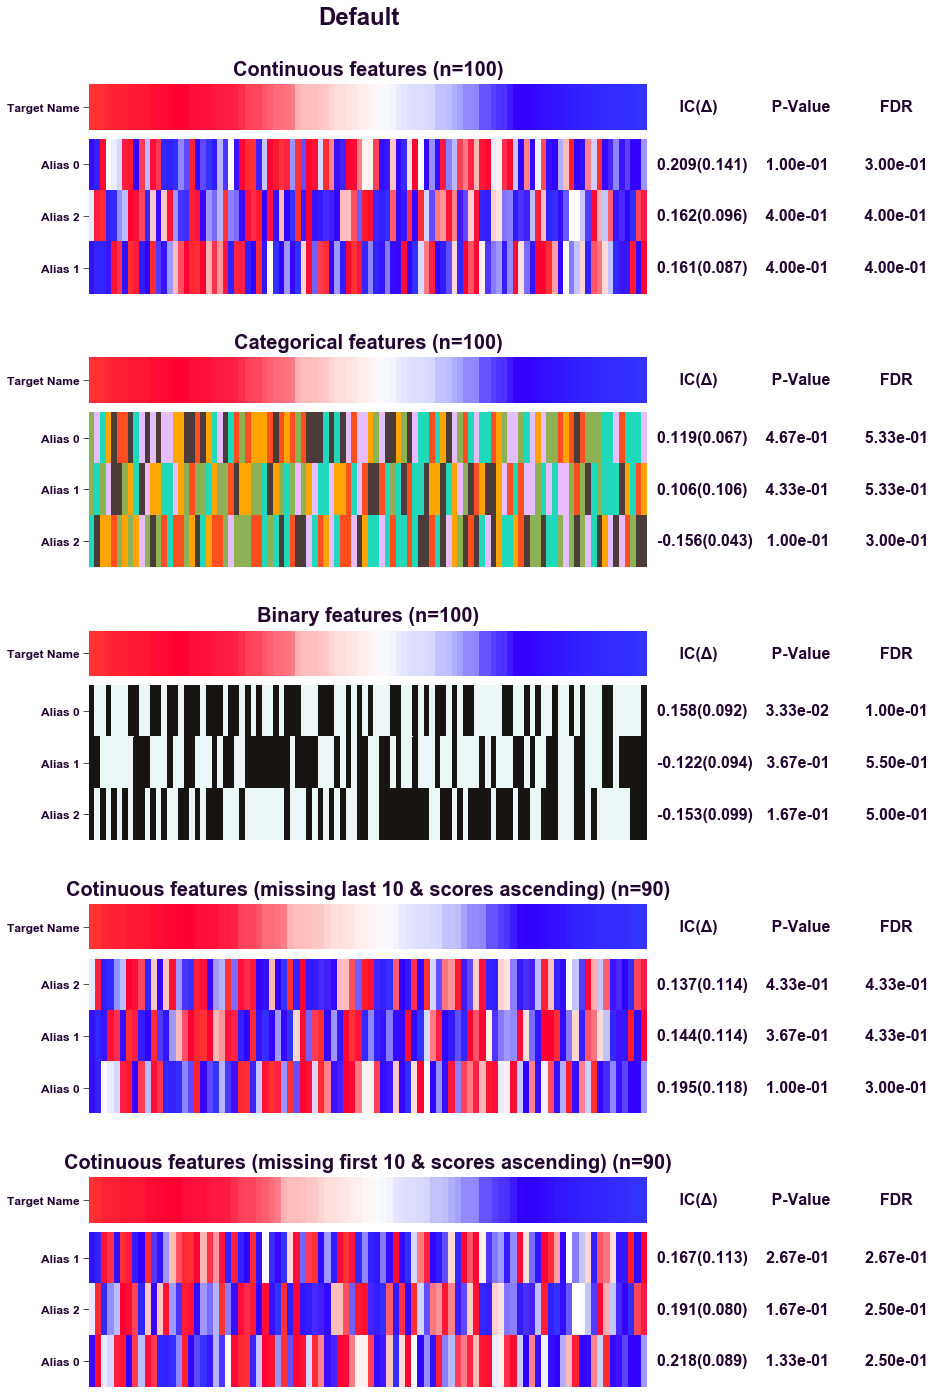

In [ ]:
make_summary_match_panel(
    target, multiple_features, title='Default', plot_column_names=True)

In [ ]:
make_summary_match_panel(
    target,
    multiple_features,
    plot_only_columns_shared_by_target_and_all_features=True,
    title='Only Columns Shared by Target and All Features',
    plot_column_names=True)

Making match panel for Continuous features ...
Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x11a9e5bf8> (1 process) ...
Computing MoEs with 10 samplings ...
	1/10 ...
	4/10 ...
	7/10 ...
	10/10 ...
	10/10 - done.
Computing p-values and FDRs with 10 permutations ...
	1/10 ...
	4/10 ...
	7/10 ...
	10/10 ...
	10/10 - done.
Making match panel for Categorical features ...
Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x11a9e5bf8> (1 process) ...
Computing MoEs with 10 samplings ...
	1/10 ...
	4/10 ...
	7/10 ...
	10/10 ...
	10/10 - done.
Computing p-values and FDRs with 10 permutations ...
	1/10 ...
	4/10 ...
	7/10 ...
	10/10 ...
	10/10 - done.
Making match panel for Binary features ...
Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x11a9e5bf8> (1 process) ...
Computing MoEs with 10 samplings ...
	1/10 ...
	4/10 ...
	7/10 ...
	

In [ ]:
array_2d_0 = np.random.random_sample((
    n_row,
    2, ))

array_2d_1 = np.random.random_sample((
    n_row,
    8, ))

make_comparison_panel(
    array_2d_0,
    array_2d_1,
    array_2d_0_name='ND Array 0',
    array_2d_1_name='ND Array 1')